Follow along with the lecture notes and complete the following cells when prompted. Uncomment the code and replace anything beginning with an ! with your own values or variables. 

## Objective 1: Data preparation
Complete the objectives below to make cuts to your data.

In [2]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('drive')

Mounted at drive


Read in your data

In [3]:
import numpy as np

read_in_array = np.loadtxt('/content/drive/MyDrive/2021-2022/22Winter/4AL/Python References/2.10 Damped Harmonics/damped_data.csv', delimiter = ',', skiprows = 1)

Extract the amplitudes and times and convert to meters.

In [4]:
time_data_array = read_in_array[:,0]

amplitude_data_arraycm = read_in_array[:,1]
amplitude_data_array = amplitude_data_arraycm * 0.01

Test plot your vs index and write down indices to clip your data such that the clipped data covers **1.5 cycles.**

Text(0, 0.5, 'Amplitude (m)')

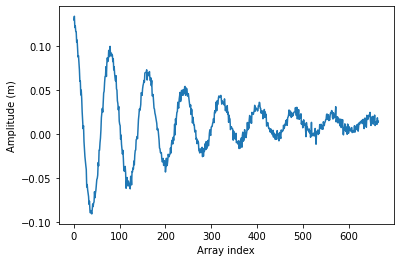

In [5]:
# Test plot
import matplotlib.pyplot as plt
plt.plot(amplitude_data_array)
plt.xlabel('Array index')
plt.ylabel('Amplitude (m)')

Clip your data using the indices you found above. You will also be subtracting off the zeroeth element so that your times in seconds start from 0.

In [6]:
amplitude_data_array_clip1 = amplitude_data_array[76:476]
time_data_array_clip01 = time_data_array[76:476]
time_data_array_clip1 = time_data_array_clip01 - time_data_array_clip01[0]

Plot your clipped data below



Text(0, 0.5, 'Amplitude (cm)')

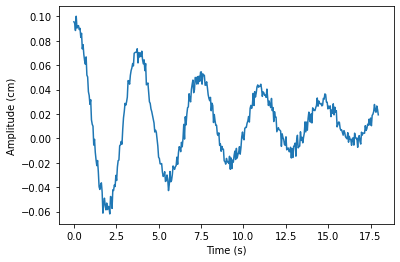

In [7]:
plt.plot(time_data_array_clip1, amplitude_data_array_clip1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (cm)')

Write down guesses for the period, amplitude, and y offset. Calculate and write down 

$\omega = \frac{2\pi}{T}$

Plug these values in to form your initial guess array. 

In [8]:
from scipy.optimize import least_squares

guess_amplitude = 0.0795
guess_omega = 2 * np.pi / 3.7
guess_offset = 0.02
guess_phi = 0.2

guess_parameters = [guess_amplitude, guess_omega, guess_offset, guess_phi]

Run the following cell to get your fit function. Write a function that takes 

`parameters = [amplitude, omega, offset, phi]`

and returns

$ y = A \cos(\omega t + \phi) + offset$

The residual function is already written

In [9]:
def cos_fit_fun(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y


def get_residuals(parameters, amplitude_data, time_data):
  theoretical_function = cos_fit_fun(parameters, time_data)
  residuals = np.abs(theoretical_function - amplitude_data)
  return residuals

Plot your data and your guess parameters below. Adjust as needed and show your final plot to the TA.

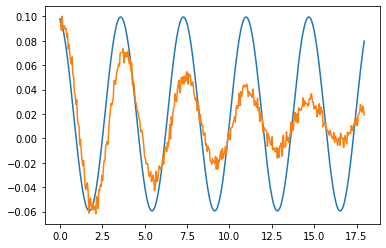

In [10]:
theoretical_guess_function = cos_fit_fun(guess_parameters, time_data_array_clip1)
plt.plot(time_data_array_clip1, theoretical_guess_function)
plt.plot(time_data_array_clip1, amplitude_data_array_clip1)

# Objective 2: Fitting

Run the cell below to fit your function

In [11]:
from scipy.optimize import least_squares

res_lsq = least_squares(get_residuals, guess_parameters, args=(amplitude_data_array_clip1,time_data_array_clip1))

Print out and plot your results below

Best Amplitude: 0.039313367099053274
Best Omega: 1.7309646372855967
Best offset: 0.013276232803690969
Best Phi: -0.33589340447795063


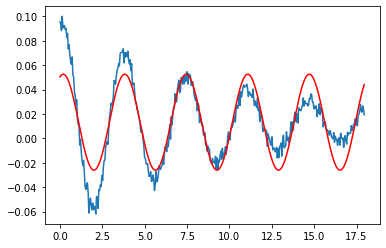

In [12]:
best_parameters = res_lsq['x']
fitted_function = cos_fit_fun(best_parameters, time_data_array_clip1)
plt.plot(time_data_array_clip1, amplitude_data_array_clip1)
plt.plot(time_data_array_clip1, fitted_function, color = 'red')
print('Best Amplitude: ' + str(best_parameters[0]))
print('Best Omega: ' + str(best_parameters[1]))
print('Best offset: ' + str(best_parameters[2]))
print('Best Phi: ' + str(best_parameters[3]))


## Objective 3: Damped system

Now we're going to ignore the oscillitory effect and just focus on the damping. See the damped fitting notes. Clip the data once more so that you get enough cycles to see a damping effect. 

In [13]:
amplitude_data_array_clip2 = amplitude_data_array[76:476]
time_data_array_clip02 = time_data_array[76:476]
time_data_array_clip2 = time_data_array_clip02 - time_data_array_clip02[0]

Text(0, 0.5, 'Amplitude)')

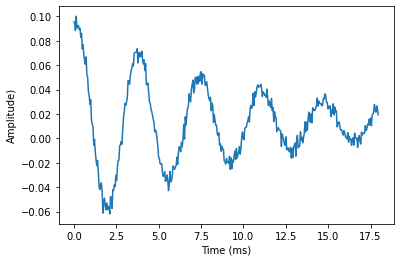

In [14]:
plt.plot(time_data_array_clip2, amplitude_data_array_clip2)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude)')

From your plot above, write down times and maximum amplitudes for at least 5 different points. Plug in these values into the function below to find estimates a tau factor. [4BL only : Confirm your results to see if the tau factor is in the same order of magnitude as the time constant you expect from an RC circuit (within a factor of 10)].

In [15]:
def find_tau(t, y_t, y_0):
  nom = t
  denom = np.log(y_0 / y_t)
  tau = nom / denom
  print('Tau is ' + str(tau))
  
find_tau(time_data_array_clip2[1], amplitude_data_array_clip2[1], amplitude_data_array_clip2[0])
find_tau(3.2, 0.07, amplitude_data_array_clip2[0])
find_tau(7.5, 0.052, amplitude_data_array_clip2[0])
find_tau(11., 0.041, amplitude_data_array_clip2[0])
find_tau(14.2, 0.033, amplitude_data_array_clip2[0])

Tau is 3.353873417802356
Tau is 10.279567241994416
Tau is 12.324404455726963
Tau is 12.998978696699316
Tau is 13.354841123421107


Use the guess for tau from above and the fitted parameters from the previous fit in guessing a new set of parameters. You can do it by appending the value of tau to the end of the best_parameters that you obtained earlier.

In [16]:
guess_parameters = np.append(best_parameters, 1000)

Run the cell below to get your fitting functions

In [17]:
def cos_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  tau = parameters[4]
  y = a * np.cos(omega * time + phi) * np.exp(-time / tau) + offset
  return y

def get_residuals(parameters, amplitude_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - amplitude_data)
  return residuals

Run the cell below to plot your guess function. 

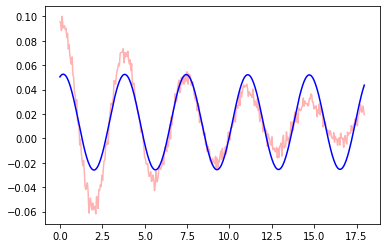

In [18]:
theoretical_guess_function = cos_fit_fun_damped(guess_parameters, time_data_array_clip2)
plt.plot(time_data_array_clip2, amplitude_data_array_clip2, color = 'red', alpha = 0.3)
plt.plot(time_data_array_clip2, theoretical_guess_function, color = 'blue')

Run the cell below to get your third fit. 

In [19]:
def get_residuals(parameters, amplitude_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - amplitude_data)
  return residuals

res_lsq = least_squares(get_residuals, guess_parameters, args=(amplitude_data_array_clip2,time_data_array_clip2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


0.08410489576239659
1.729140049341836
0.012199124929234858
-0.308664856182118
9.74634341245837


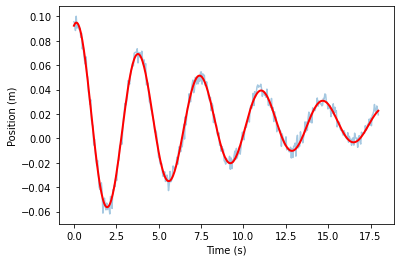

In [24]:
best_parameters = res_lsq['x']
fitted_function = cos_fit_fun_damped(best_parameters, time_data_array_clip2)
plt.plot(time_data_array_clip2, amplitude_data_array_clip2, alpha = 0.4)
plt.plot(time_data_array_clip2, fitted_function, color = 'red', linewidth = 2.0)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
#Print all the set of best_parameters
print(best_parameters[0])
print(best_parameters[1])
print(best_parameters[2])
print(best_parameters[3])
print(best_parameters[4])

In [21]:
def velocity_fit(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  tau = parameters[4]
  v = ( -a * np.exp(-time / tau) * (tau * omega * np.sin(omega * time + phi) + np.cos(omega * time + phi)) ) / tau
  return v

def acceleration_fit(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  tau = parameters[4]
  acc = ( a * np.exp(-time / tau) * (2. * tau * omega * np.sin(omega * time + phi) + (1 - (tau**2. * omega**2.)) * np.cos(omega * time + phi)) ) / (tau**2.)
  return acc



Text(0, 0.5, 'Velocity (m/s)')

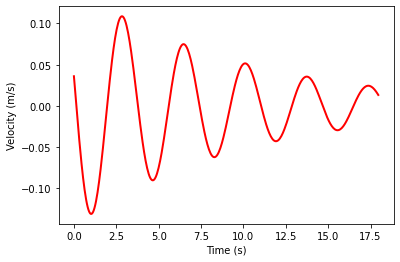

In [22]:
velocity = velocity_fit(best_parameters, time_data_array_clip2)
plt.plot(time_data_array_clip2, velocity, color = 'red', linewidth = 2.0)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')

Text(0, 0.5, 'Acceleration (m/s^2)')

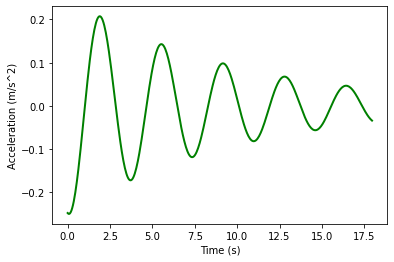

In [23]:
acceleration = acceleration_fit(best_parameters, time_data_array_clip2)
plt.plot(time_data_array_clip2, acceleration, color = 'green', linewidth = 2.0)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')